# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [1]:
! git clone https://github.com/DS3001/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 34 (delta 2), reused 1 (delta 1), pack-reused 29
Receiving objects: 100% (34/34), 8.06 MiB | 13.59 MiB/s, done.
Resolving deltas: 100% (6/6), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [6]:
#1
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("/content/visualization/assignment/data/college_completion.csv")


In [ ]:
#2
df.shape # 3798 rows/observations and 63 columns
df.columns.tolist() # list of available variables
df.head() # variables include city, state, level

In [ ]:
#3
pd.crosstab(df['control'], df['level'])
# there are more public 2-year universities than private 2-year universities
# private not-for-profit unis have more 4-year unis than 2-year unis and so do private for-profit unis though there is less of a difference between the two

<Axes: >

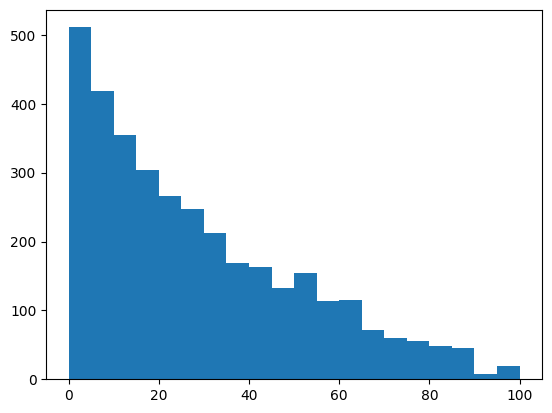

In [26]:
#4
var = 'grad_100_value'
df[var].hist(bins=20, grid=False) # histogram

In [ ]:
sns.kdeplot(df[var]) #kernel density plot

In [ ]:
df[var].plot.box() # box plot

In [ ]:
descr = df[var].describe() # statistical description
print(descr,'/n')

# Computing the Variance:
std = descr[2] # Accessing the standard deviation from the description object
var = std**2
print('Variance: ', var,'\n')

# Computing the IQR:
thirdQ = descr[6] # Getting the 75% percentile
firstQ = descr[4] # Getting the 25% percentile
IQR = thirdQ - firstQ # Computing the IQR
print('IQR: ', IQR)

<Axes: ylabel='Density'>

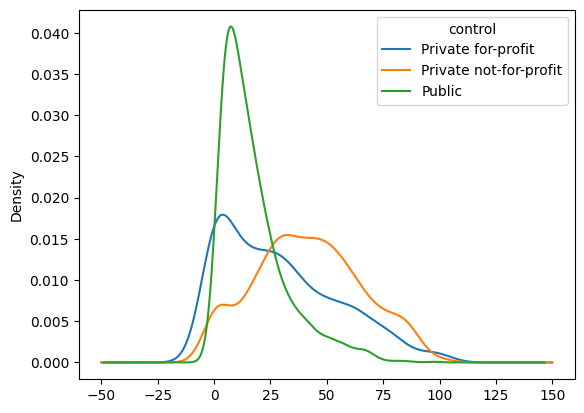

In [27]:
#5
group_by = 'control'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
# percent of students completing degree w/in 100% of time is typically towards the greater range for private-not-for-profit unis
# lowest percent of students completing degree w/in 100% of time is in public unis
# graduation rates appear to be best for private-not-for-profits, followed by private for-profits, followed by public unis

<Axes: ylabel='Density'>

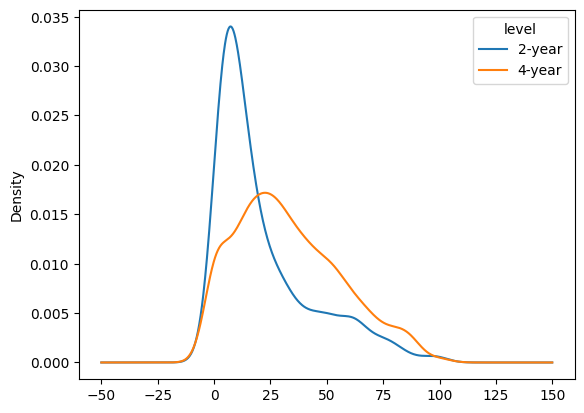

In [28]:
group_by = 'level'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
# lower percent of students completing degree w/in 100% of time for  2-year uni than for 4-year uni typically
# percent of students completeing degree w/in 100% of time is skewed towards upper range for 4-year unis, which appear to have better graduation rates


<Axes: ylabel='Density'>

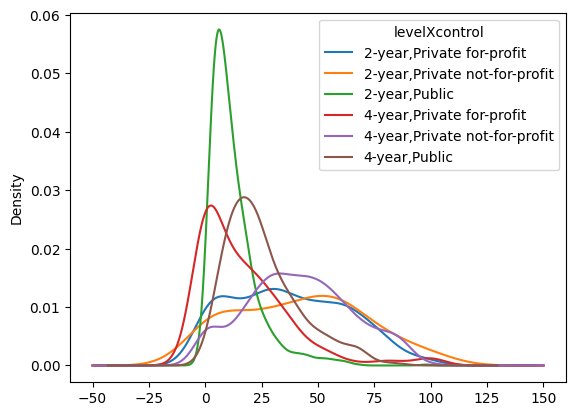

In [30]:
#6
df['levelXcontrol']=df['level']+','+df['control']
group_by = 'levelXcontrol'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
# institutions appearing to have best grad rates are 2 year and 4 year private-not-for profit and 2 year private for-profit

<Axes: ylabel='Density'>

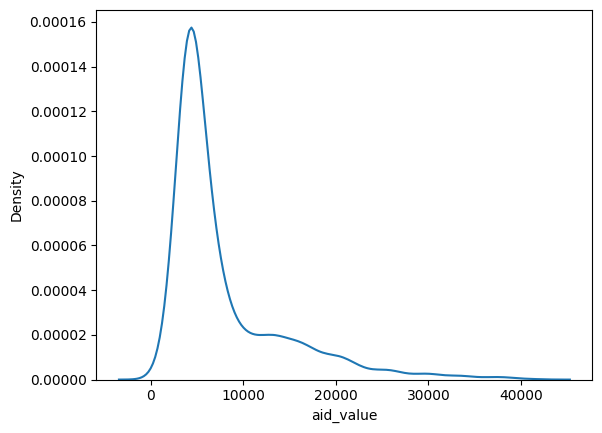

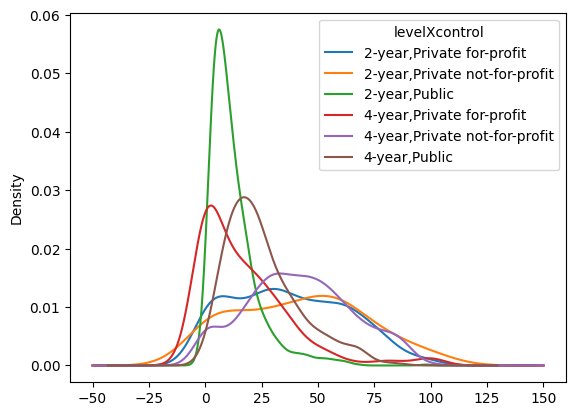

In [32]:
#7
sns.kdeplot(df["aid_value"])
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
# peak near 0-10000 due to both 2-year and 4-year public unis and 4 year private for-profit unis
# hump near 10000-20000 due to all other unis typically giving aid around these values




Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

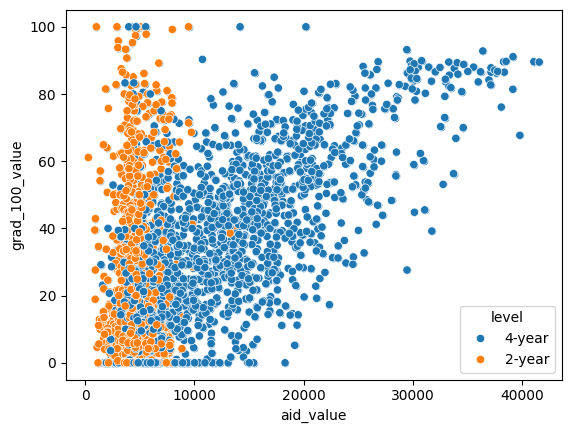

In [40]:
df.plot.scatter(y=var,x='aid_value')
# as aid value increases, graduation rates typically increase, though many given no aid also have high graduation rates
sns.scatterplot(data=df, y=var, x="aid_value", hue="level")
# 4 year unis typically give more aid than 2 years which usually give less than 100000 in aid
# for 4-year unis, more aid seems to increase graduation rates

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

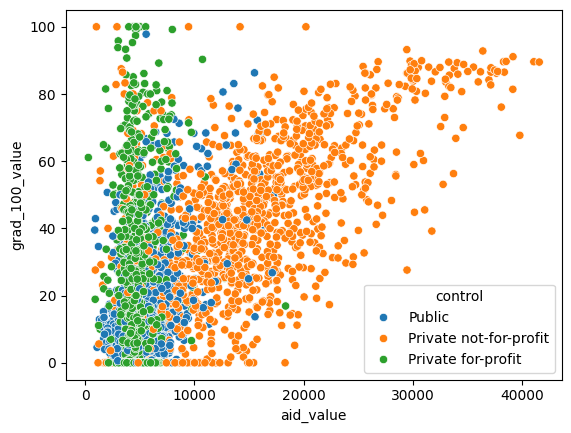

In [41]:
sns.scatterplot(data=df, y=var, x="aid_value", hue="control")
# private for-profit unis typically recieve the least aid followed by public unis than private not-for-profit unis
# for private not-for-profit units, more aid seems to increase graduation rates

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.